In [ ]:
# 초기 설정
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os

In [ ]:
# drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
import matplotlib.font_manager as fm
font10 = fm.FontProperties(fname=path, size=10)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [ ]:
# 한글 폰트 경로 지정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

In [ ]:
# csv 해당 파일 불러오기
train_path = '/content/drive/MyDrive/card_train.csv'
test_path = '/content/drive/MyDrive/card_test.csv'

In [ ]:
# train_df
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')

In [ ]:
# 열, 행 추출
train_df.shape

(70560, 738)

In [ ]:
# train_df 차트 드러내기
train_df.head()

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E


In [ ]:
# 열만 추출
for i in train_df.columns:
  print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [ ]:
# keywords 추출 -> 포함되어 있는 keyword 만 따로 추출
usage_keywords = ["금액", "카드수", "이용", "연회비", "일시불"]
risk_keywords = ["한도", "채권", "연체", "채무"]
marketing_keywords = ["컨택", "캠페인", "이용유도"]
prediction_keywords = ["탈회", "불만제기", "경과"]

all_keywords = usage_keywords + risk_keywords + marketing_keywords + prediction_keywords

matched_columns = []
for col in train_df.columns:
    for keyword in all_keywords:
        if keyword in col:
            matched_columns.append(col)
            break

print(matched_columns)

['청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '할인금액_R3M', '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '혜택수혜금액', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'RV일시불이자율_할인전', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월', '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M', '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '월상환론상향가능한도금액', '일시불ONLY전환가능여부', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수', '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', 'rv최초시작후경과일', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용건수_카드론

In [ ]:
# matched_df로 변환
matched_df = train_df[matched_columns]

In [ ]:
# 정리된 내용 CSV파일로 저장
# (utf-8-sig로 인코딩) -> 한국어 깨짐 방지
matched_df.to_csv("matched_columns_output1.csv", index=False, encoding='utf-8-sig')

In [ ]:
# 정돈된 csv 불러오기
matched = '/content/matched_columns_output1.csv'

In [ ]:
matched_columns_output1 = pd.read_csv(matched)

In [ ]:
# 정돈된 행, 열 추출
matched_columns_output1.shape

(70560, 500)

In [ ]:
matched_columns_output1.head()

,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_이용포인트_R12M,포인트_이용포인트_R3M,마일_이용포인트_R12M,마일_이용포인트_R3M,할인금액_R3M,할인금액_B0M,할인금액_청구서_R3M,...,컨택건수_이용유도_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,466,1678,3462,0,0,0,0,0,0,0,...,0,0,0,5,5,0,0,0,1회 이상,1일 이상
1,2417,7778,16768,0,0,0,0,0,0,0,...,56,0,0,4,6,0,0,0,1회 이상,1일 이상
2,0,0,254,0,0,0,0,0,0,0,...,1,0,2,4,2,0,0,0,5회 이상,5일 이상
3,5931,15957,34480,9051,2285,0,0,0,0,0,...,13,0,0,0,0,0,0,0,1회 이상,1일 이상
4,684,2661,5642,0,0,0,0,10,12,11,...,0,0,2,0,0,0,0,0,10회 이상,10일 이상


In [ ]:
# 다운로드
from google.colab import files
files.download("matched_columns_output1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load dataset - 중요도
train_df = pd.read_csv('/content/matched_columns_output1.csv', encoding='utf-8-sig')

# 2. 타겟 불러오기
y = pd.read_csv('/content/drive/MyDrive/card_train.csv', encoding='utf-8-sig')["Segment"]

In [ ]:
# 키워드 기반 피처 선택 함수
def select_features_by_keywords(df, keywords, time_filters=["B0M", "R3M", "R6M", "R12M"]):
    return df[[col for col in df.columns if any(k in col for k in keywords) and any(t in col for t in time_filters)]]

In [ ]:
def train_model_with_keywords(X, y):
    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# 4. 모델 훈련
def train_model_with_keywords(X, y):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score
    from lightgbm import LGBMClassifier

    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# 중요도 시각화 함
def plot_feature_importance(model, feature_names, top_n=30):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.306788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30990
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 246
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


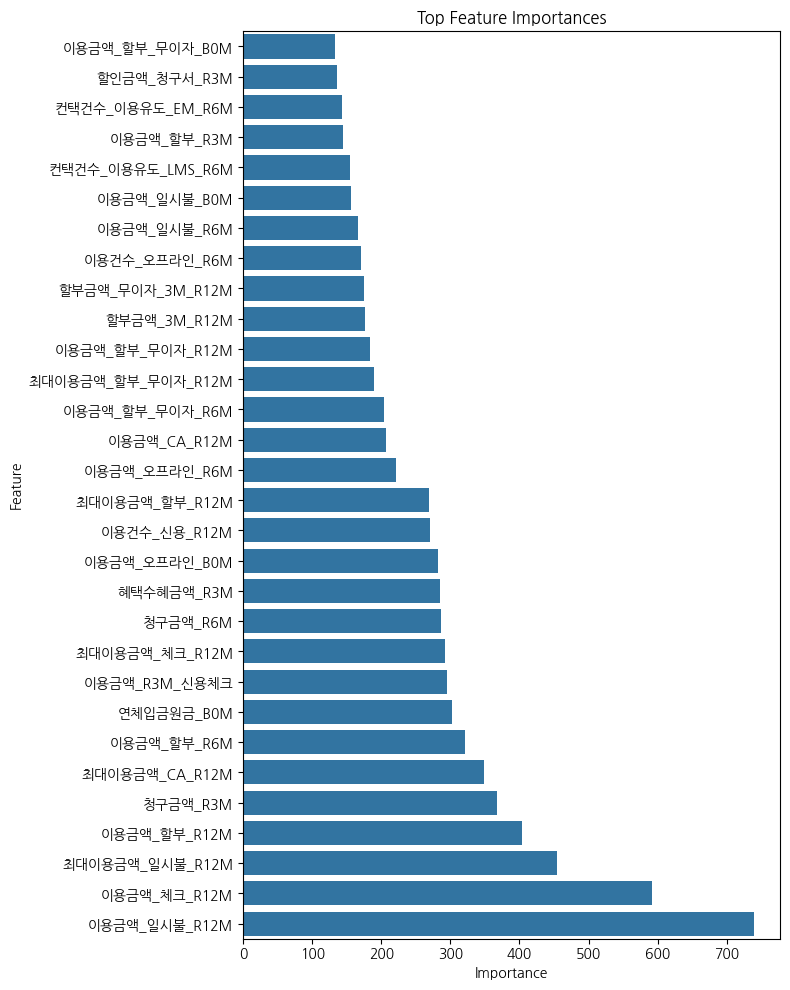

In [ ]:
# 실험: 키워드만 바꿔가며 반복
keywords = ["이용", "금액", "연체"]
X_selected = select_features_by_keywords(train_df, keywords)
model, score = train_model_with_keywords(X_selected, y)

print(f"Macro F1 score: {score:.4f}")
plot_feature_importance(model, X_selected.columns)

In [ ]:
# 상위 집단 키워드 설정 (9개)
# 임의 지정한 것.
top_9_keywords = ["이용", "금액", "카드", "입회", "연회비", "한도", "채권", "불만"]

In [ ]:
# 키워드 기반 피처 선택 함수 정의..
def select_features_by_keywords(df, keywords):
    return df[[col for col in df.columns if any(k in col for k in keywords)]]

In [ ]:
# 결측치 처리 및 라벨 인코딩
X_encoded = X_selected.fillna("missing").copy()
for col in X_encoded.select_dtypes(include="object").columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

In [ ]:
# LightGBM 모델 학습
model = LGBMClassifier(random_state=42)
model.fit(X_encoded, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.300700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55250
[LightGBM] [Info] Number of data points in the train set: 70560, number of used features: 404
[LightGBM] [Info] Start training from score -7.832014
[LightGBM] [Info] Start training from score -9.777924
[LightGBM] [Info] Start training from score -2.933908
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [ ]:
# 중요도 추출 및 DataFrame 생성
importance_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

In [ ]:
# 상위 40~80개 중요 피처 선택 (중요도 0 이상, 최대 80개)
selected_top_features = importance_df[importance_df["importance"] > 0].head(80)
selected_columns = selected_top_features["feature"].tolist()

In [ ]:
# 선택된 피처로 최종 데이터프레임 생성
final_df = matched_df[selected_columns]

In [ ]:
# 결과 CSV 저장 (한글 깨짐 방지용 utf-8-sig)
final_df.to_csv("selected_important_features.csv", index=False, encoding='utf-8-sig')

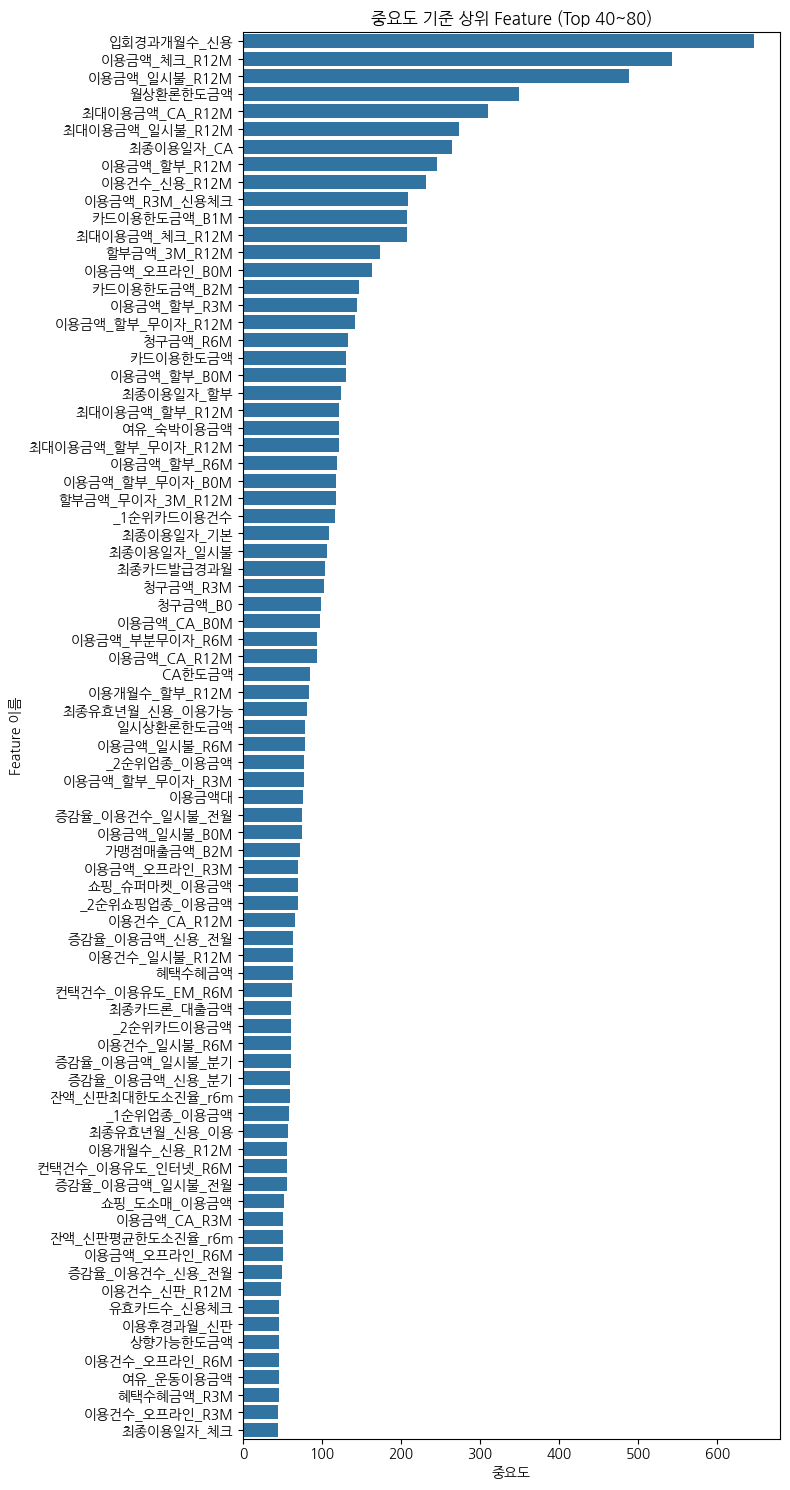

In [ ]:
# 중요도 시각화
plt.figure(figsize=(8, 15))
sns.barplot(x="importance", y="feature", data=selected_top_features,
            order=selected_top_features.sort_values(by="importance", ascending=False)["feature"])
plt.title("중요도 기준 상위 Feature (Top 40~80)")
plt.xlabel("중요도")
plt.ylabel("Feature 이름")
plt.tight_layout()
plt.show()